<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>E-Commerce Customer Churn</center></h1>

<a id="Importing"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Importing Important Libraries</center></h1>  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Overview</center></h1>

In [ ]:
# Step 1: Data Loading and Understanding

df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [ ]:
# colums to list
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion    

In [ ]:

df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
CustomerID
55630    1
50001    1
50002    1
50003    1
50004    1
        ..
50019    1
50018    1
50017    1
50016    1
50015    1
Name: count, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0 

In [ ]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,3996
Computer,1634


In [ ]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
df['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
Cash on Delivery,514
UPI,414


In [ ]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

,0
CustomerID,int64
Churn,object
Tenure,float64
PreferredLoginDevice,object
CityTier,object
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,object


In [ ]:
# Categorical cols after Converting
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,6,5,5,3,15,2
top,0,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Married,2,0
freq,4682,3996,3666,2314,3384,2377,2080,1698,2986,1369,4026


In [ ]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

,,,0
column,n_missing,percentage,
CashbackAmount,0,0.000000,1
Churn,0,0.000000,1
CityTier,0,0.000000,1
Complain,0,0.000000,1
CouponUsed,256,4.547069,1
CustomerID,0,0.000000,1
DaySinceLastOrder,307,5.452931,1
Gender,0,0.000000,1
HourSpendOnApp,255,4.529307,1


<a id="EDA"></a>
<div class="EDA (Exploratory Data Analysis)" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>EDA (Exploratory Data Analysis)</center></h1>


<div style="background-color:#DC143C; color:black; padding: 5px; margin: 5px; font-size: 110%; border-radius: 15px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);"><h3 style="color: white;"><center>Bussiness Questions<center></h3>
  </div>

<div style="background-color:#DC143C; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">  
  <ol>
    <li style="color: white;"> Is there a relationship between Gender and Churn? & Which Gender has more Orders?</li>
    <li style="color: white;">Which MartialStatus has the highest Churn rate?</li>
    <li style="color: white;">Which CityTier has higher Tenure and OrderCount?</li>
    <li style="color: white;">Is Customer with High SatisfactionScore have high HourSpendOnApp?<br>Is there a correlation between SatisfactionScore and HourSpendOnApp?</li>
    <li style="color: white;">Which CityTier has the most HourSpendOnApp?</li>
    <li style="color: white;">What is the relation between NumberOfAddress and CityTier within the churn segment?</li>
    <li style="color: white;">What is the relation between Complain and DaySinceLastOrder?</li>
    <li style="color: white;">Is there a relationship between PreferredLoginDevice and Churn?</li>
    <li style="color: white;">What is the distance between warehouse to customer house in different city tier?</li>
    <li style="color: white;">Does different CityTiers has different prefered products?</li>
    <li style="color: white;">What is the preferred payment mode for different CityTiers?</li>
    <li style="color: white;">Which CityTier has the highest OrderCount?</li>
    <li style="color: white;">Does the percentage increase in order amount from last year affect churn rate?</li>
    <li style="color: white;">What is the relation between Complain and DaySinceLastOrder?</li>
    <li style="color: white;">What is ordercount for customers with high HourSpendOnApp?</li>
    <li style="color: white;">Is there a relationship between preferred order category and churn rate?</li>
    <li style="color: white;">Do customers who used more coupons have lower churn rates?</li>
    <li style="color: white;">Is there a connection between satisfaction score and number of orders in the past month?</li>
    <li style="color: white;">There is relation between CashbackAmount and  order counts within churn?</li>
    <li style="color: white;">Are customers who complained more likely to churn?</li>       
  </ol>
</div>

</div>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


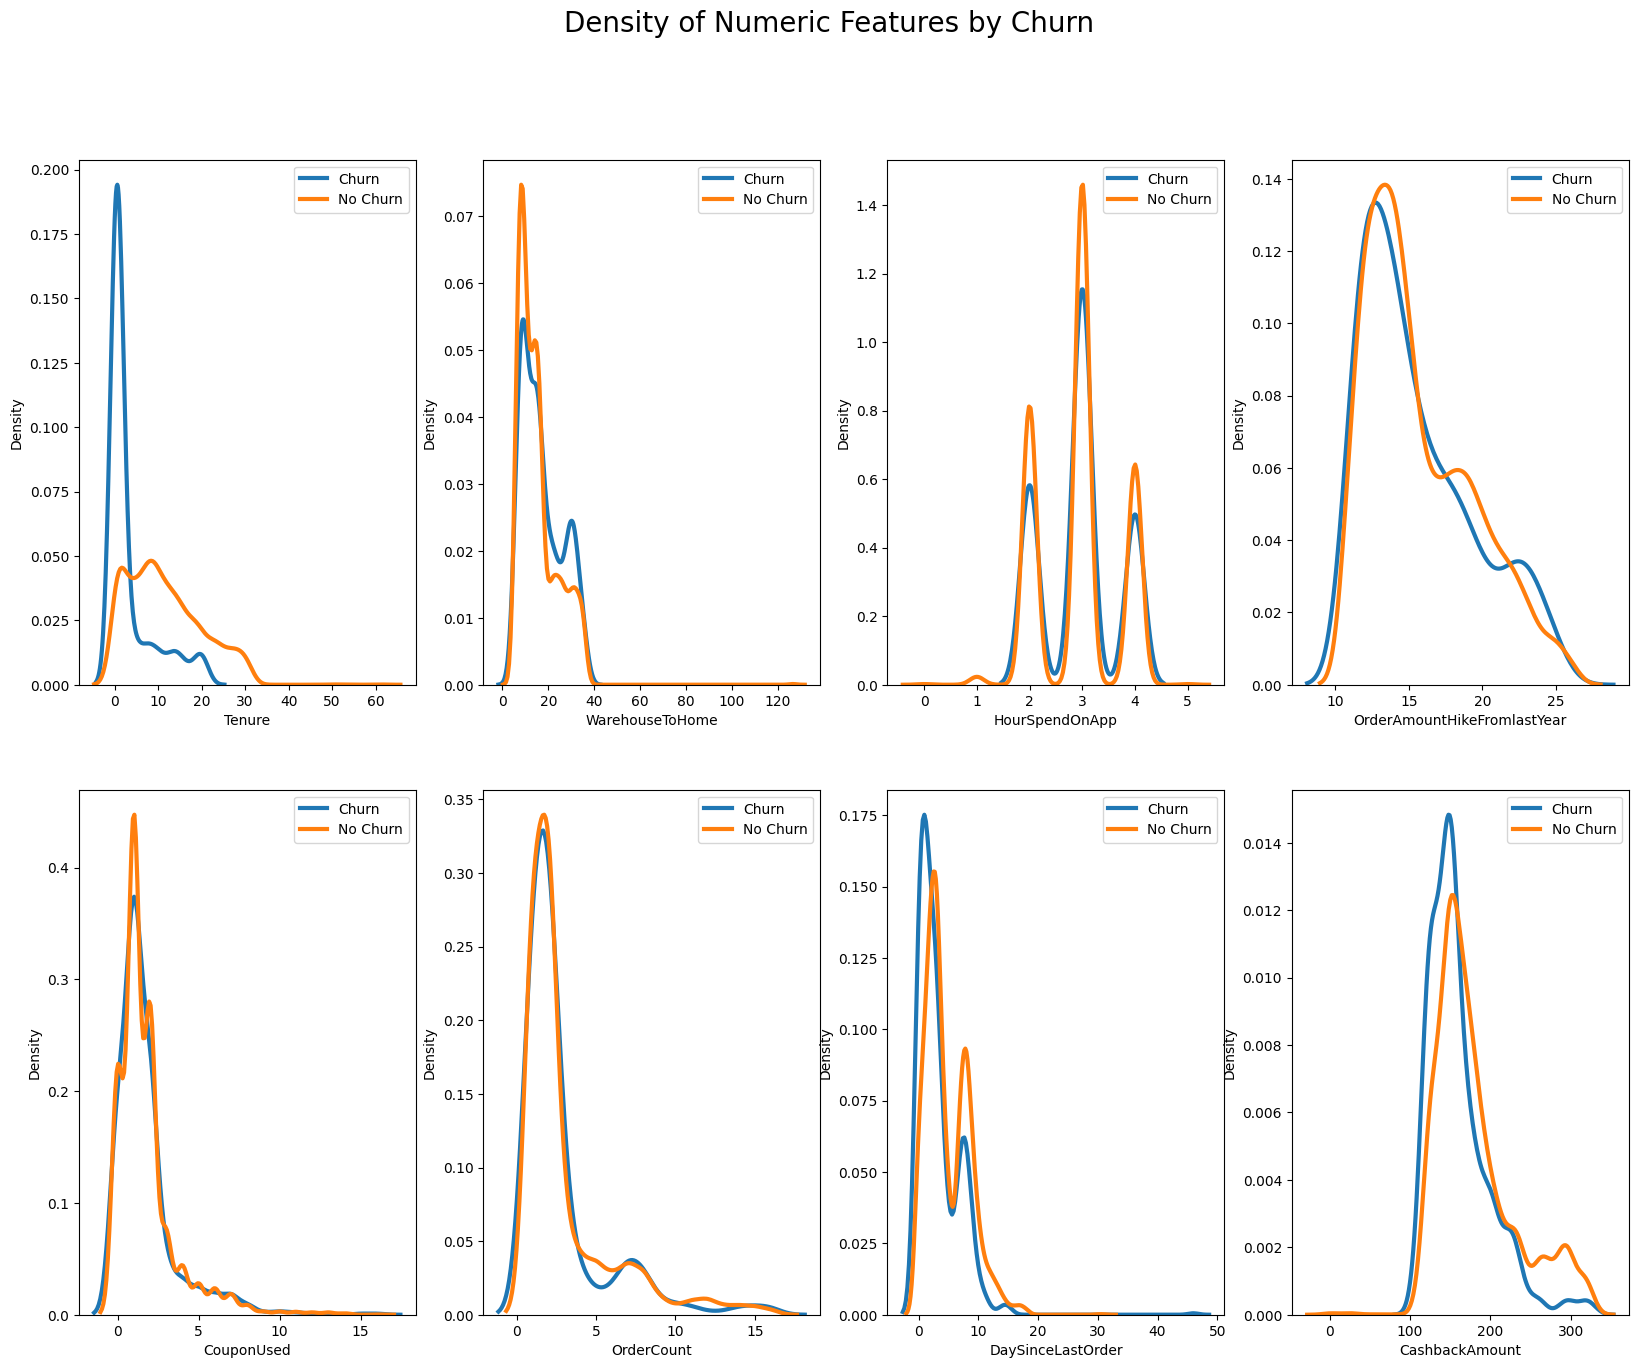

In [ ]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()


<div class="Distributions Insights" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h3><center>Distributions Insights Of the Numeric Features</center></h3>
  <ul>
    <li >Tenure: Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.</li>
    <li>CityTier: Churn rate looks similar across tiers. City tier does not seem predictive of churn.</li>
    <li>WarehouseToHome: Shorter warehouse to home distances have a lower churn rate. Faster deliveries may improve satisfaction.</li>
    <li>HourSpendOnApp: More time spent on app correlates with lower churn. App engagement is a good sign.</li>
    <li>NumberOfDeviceRegistered: More registered devices associates with lower churn. Access across devices improves convenience.</li>
    <li>SatisfactionScore: Higher satisfaction scores strongly associate with lower churn, as expected. Critical driver.</li>
    <li>NumberOfAddress: Slight downward trend in churn as number of addresses increases. More addresses indicates loyalty.</li>
    <li>Complain: More complaints associate with higher churn, though relationship isn't very strong. Complaints hurt satisfaction.</li>
    <li>OrderAmountHikeFromLastYear: Big spenders from last year are less likely to churn. Good to retain big customers.</li>
    <li>CouponUsed: Coupon usage correlates with lower churn. Coupons enhance loyalty.</li>
    <li>OrderCount: Higher order counts associate with lower churn. Frequent usage builds habits.</li>
    <li>DaySinceLastOrder: Longer since last order correlates with higher churn. Recency is a good predictor.</li>
 </ul>
 </div>

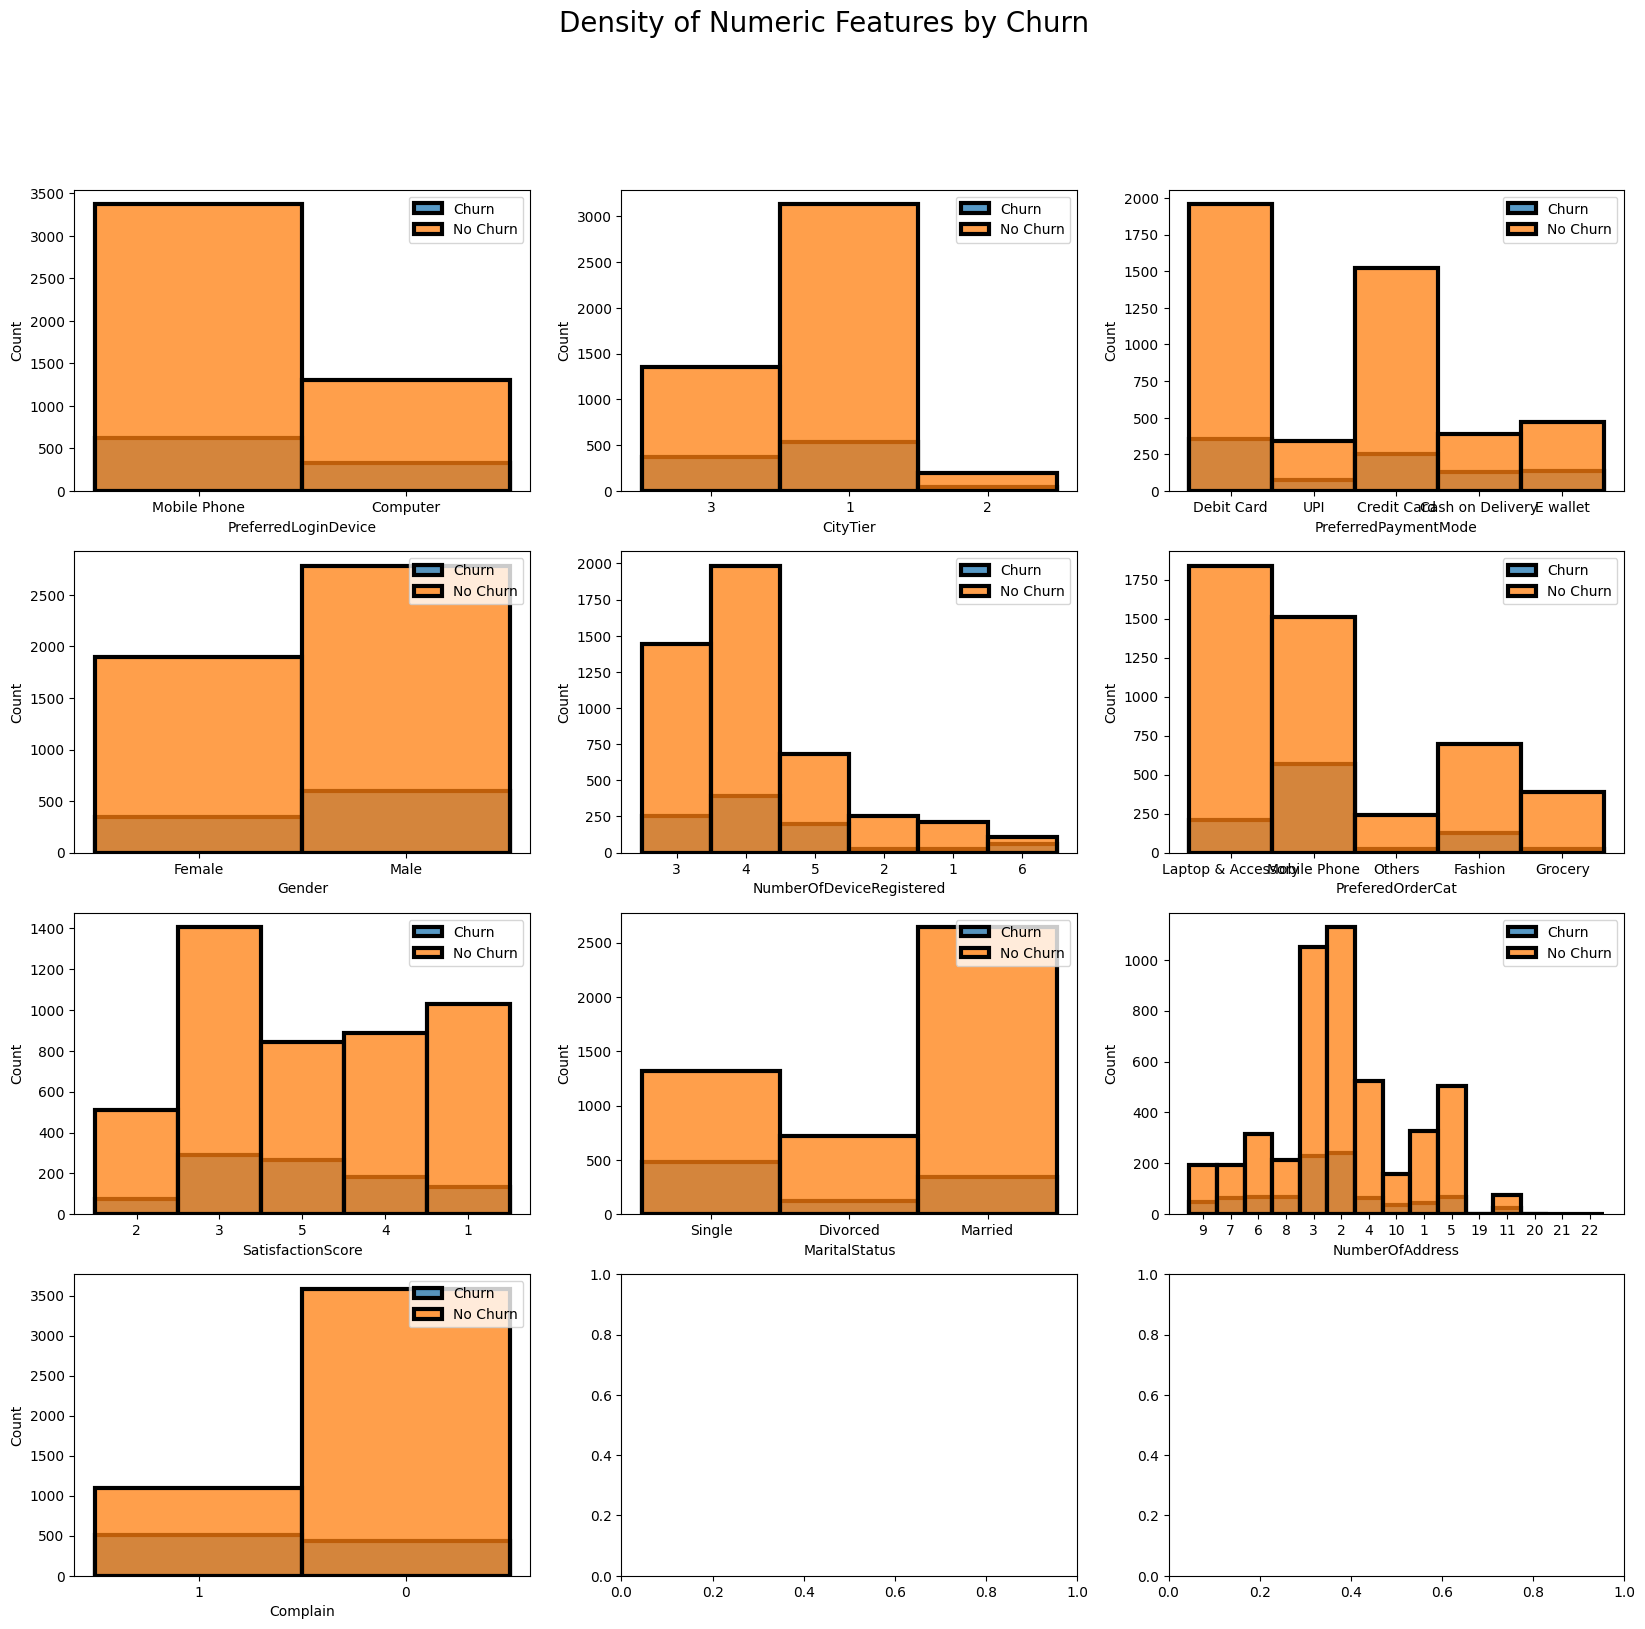

In [ ]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [ ]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

### 1-Is there a relationship between Gender and Churn? & Which Gender has more Orders?

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3384
Female,2246


In [ ]:
df.groupby("Churn")["Gender"].value_counts() # the churned females ratio 348/2246 * 100
                                              # the churned males ratio 600/3384 * 100

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: count, dtype: int64

In [ ]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts() # the churned females ratio 348/2246 * 100


PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.0             97
                      9.0             43
                      12.0            39
                      11.0            35
                      15.0            25
                      10.0            21
                      13.0            21
                      16.0            19
                      14.0            16
Name: count, dtype: int64

<Axes: xlabel='Gender'>

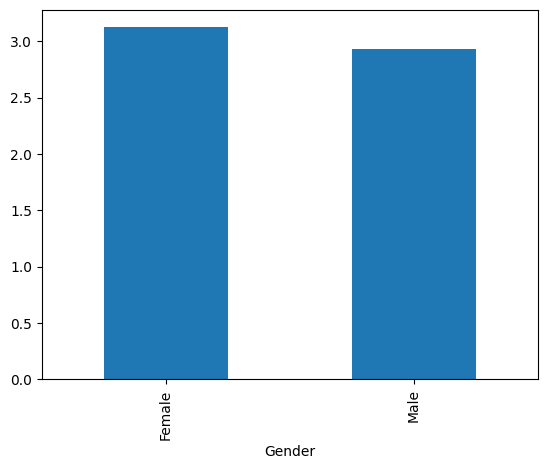

In [ ]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders  # females have more order count avg

there is not a big difference between the males and the femals: avg order

In [ ]:
percentageM =600/3384 * 100

percentageM   #the percentage of the leaving males out of the males

17.73049645390071

In [ ]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females


15.49421193232413

In [ ]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

# # Create figure
# fig = px.pie(df, values='OrderCount', names='Gender')
# fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# # Update layout
# fig.update_layout(
#   title='order Rate by Gender',
#   legend_title='Gender'
# )

# # Show plot
# fig.show()

as we see the males are more likely to churn as we have 63.3 % churned males from the app may be the company should consider incresing the products that grap the males interest and so on.. we are going to see if there is another factors that makes the highest segment of churned customers are males.

### 2-Which MartialStatus has the highest Churn rate?

In [ ]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: count, dtype: int64

Text(0, 0.5, 'Churn Rate')

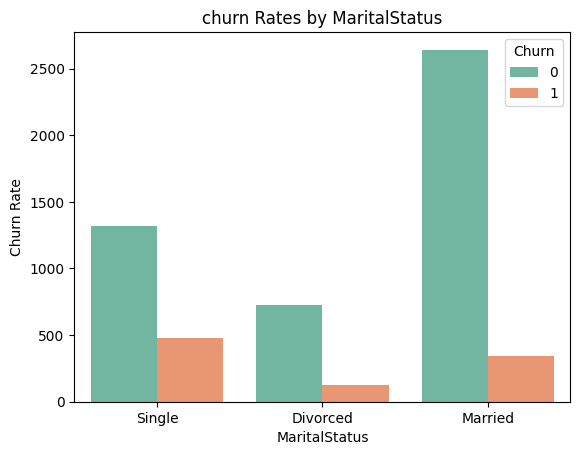

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

-the married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app

### 3-Which CityTier has higher Tenure and OrderCount?


In [ ]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

,mean,max
CityTier,,
1,10.528818,51.0
2,11.169725,31.0
3,9.361740,61.0


In [ ]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

,mean,max
CityTier,,
1,2.953255,16.0
2,2.584034,13.0
3,3.185185,16.0


In [ ]:
# means = df_grouped['Tenure']['mean']
# means.plot(kind='pie',autopct='%1.1f%%')
# plt.xlabel('CityTier')
# plt.ylabel('Mean Tenure')


citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor

In [ ]:
df.groupby("CityTier")["OrderCount"].mean()

,OrderCount
CityTier,
1,2.953255
2,2.584034
3,3.185185


citytier 3 has the highest order avg but it not to be a strong factor in the customer churning

### 4-Is Customer with High SatisfactionScore have high HourSpendOnApp?
### Is there a correlation between SatisfactionScore and HourSpendOnApp?

In [ ]:
df['SatisfactionScore'].dtypes

dtype('int64')

In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()



# sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=df)
# ax = df[['SatisfactionScore','HourSpendOnApp']].value_counts().plot(kind='bar')


as we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app

### 5-Which CityTier has the most HourSpendOnApp?

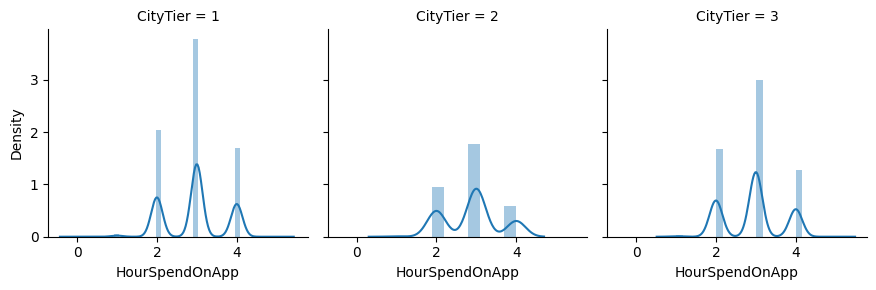

In [ ]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

city tier 1 has the most spended hours on the app

### 6-What is the relation between NumberOfAddress and CityTier within the churn segment?

In [ ]:
df.groupby("CityTier")["NumberOfAddress"].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          19                   1
          20                   1
          21                   1
          22                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          7                   10
          8                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5                  164
          1                  120
          6                  114
          8                   83
          9                   83
          7                   73
          10                  52
          11                  18
Name: count, dtype: int64

<Axes: xlabel='CityTier', ylabel='NumberOfAddress'>

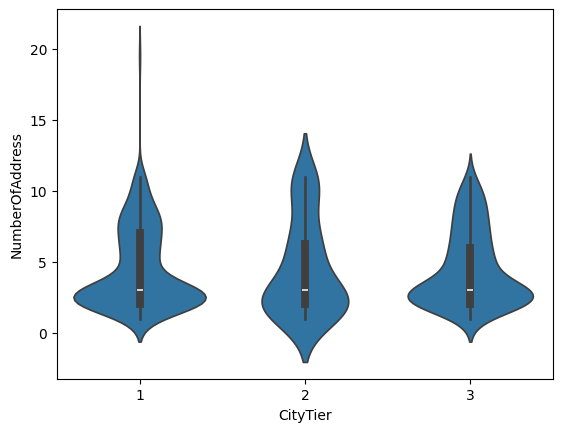

In [ ]:
# Violin plots
import seaborn as sns
sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])


There is a negative correlation between CityTier and NumberOfAddress. Higher CityTiers are associated with lower average NumberOfAddress and a more concentrated distribution.
Customers in larger cities (CityTier 1) tend to have more addresses on average compared to smaller cities and towns in lower tiers.
The relationship suggests address density and type of locality (metro vs smaller cities vs towns) impacts how many addresses customers have across city types.

### 7-What is the relation between Complain and DaySinceLastOrder?

In [ ]:
# Pearson correlation
df[['DaySinceLastOrder', 'Complain']].corr()

,DaySinceLastOrder,Complain
DaySinceLastOrder,1.000000,-0.043546
Complain,-0.043546,1.000000


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

there is a weak negative relation between complainig and the number of dayes since last order




### 8-Is there a relationship between PreferredLoginDevice and churn?



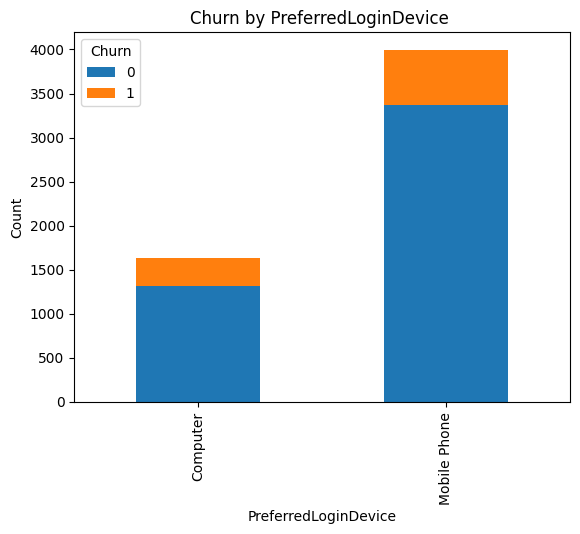

In [ ]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()


mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version


## 9-What is distancebetween warehosue to customer house in different city tier ?



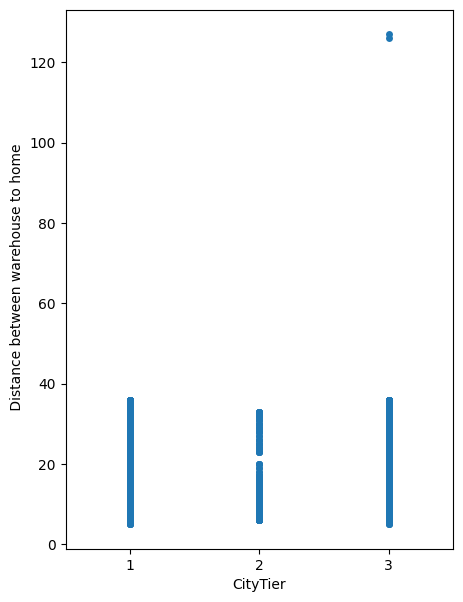

In [ ]:
df3 = df.copy()

df3['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df3, jitter = False)
plt.ylabel(' Distance between warehouse to home');

Inference: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.

### 10-Does different citytiers has different prefered products?


In [ ]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

laptop & accesories and mobile phones are the prefered category for all the city tiers




### 11- What is the preferred payment mode for different CityTiers?

In [ ]:
df2['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
Cash on Delivery,514
UPI,414


In [ ]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
Name: count, dtype: int64

In [ ]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=red_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

#### preferred payment method for CityTier '1' ==> DebitCard
#### preferred payment method for CityTier '2' ==> UPI
#### preferred payment method for CityTier '3' ==> E wallet

### 12-Which CityTier has the highest OrderCount?

In [ ]:
df2.groupby('CityTier')[['OrderCount']].sum()

,OrderCount
CityTier,
1,10298.0
2,615.0
3,5246.0


In [ ]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

### CityTier '1' has highest order count with 10298 orders

### 13-Does the percentage increase in order amount from last year affect churn rate?

In [ ]:
df2['OrderAmountHikeFromlastYear'].value_counts()

,count
OrderAmountHikeFromlastYear,
14.0,750
13.0,741
12.0,728
15.0,542
11.0,391
16.0,333
18.0,321
19.0,311
17.0,297


In [ ]:
df2.groupby('OrderAmountHikeFromlastYear')['Churn'].count()

,Churn
OrderAmountHikeFromlastYear,
11.0,391
12.0,728
13.0,741
14.0,750
15.0,542
16.0,333
17.0,297
18.0,321
19.0,311


In [ ]:
comp_ten = df2.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

#### Graph Show when the percentage of order last year increase the churn rate decrease so OrderAmountHikeFromlastYear has postive effect on Churn rate and we need to focus when customer has percentage 12% - 14%


### 14-What is the relation between Complain and DaySinceLastOrder for churned customers?

In [ ]:
df_c.groupby('Complain')[['DaySinceLastOrder']].sum()

,DaySinceLastOrder
Complain,
0,1313.0
1,1580.0


In [ ]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

#### customers who didn't made complain has higher DaySinceLastOrder , however it's only one customer so its an outlier if we remove it we will customers with no complain has lower DaySinceLastOrder


### 15-What is the order counts for customers with high HourSpendOnApp?

In [ ]:
# we will make binnig for column HourSpendOnApp
df2['HourSpendOnApp'].agg(['min','max'])

,HourSpendOnApp
min,0.0
max,5.0


In [ ]:
# Define the bin range
bins = [0 , 1 , 3 , 6]
label = ['low' , 'medium' , 'high']
# Create a new column 'HourSpendOnApp_bins' with the binned values
df2['HourSpendOnApp_bins'] = pd.cut(df2['HourSpendOnApp'], bins=bins , labels = label)

In [ ]:
df2.groupby(['HourSpendOnApp_bins','OrderCount'])[['CustomerID']].count()

CustomerID
HourSpendOnApp_bins OrderCount            
low                 1.0                 16
                    2.0                  7
                    3.0                  1
                    4.0                  3
                    5.0                  0
                    6.0                  0
                    7.0                  4
                    8.0                  0
                    9.0                  0
                    10.0                 0
                    11.0                 1
                    12.0                 1
                    13.0                 0
                    14.0                 0
                    15.0                 0
                    16.0                 0
medium              1.0               1553
                    2.0               1242
                    3.0                267
                    4.0                160
                    5.0                130
                    6.0                105
                    7.0                169
                    8.0                 99
                    9.0                 53
                    10.0                21
                    11.0                46
                    12.0                36
                    13.0                24
                    14.0                34
                    15.0                21
                    16.0                13
high                1.0                  1
                    2.0                738
                    3.0                 96
                    4.0                 34
                    5.0                 45
                    6.0                 30
                    7.0                 25
                    8.0                 69
                    9.0                  9
                    10.0                15
                    11.0                 4
                    12.0                15
                    13.0                 6
                    14.0                 2
                    15.0                10
                    16.0                10

In [ ]:
sunbrust_gr = df2.loc[:,['HourSpendOnApp_bins','OrderCount']].dropna()

In [ ]:
fig = px.sunburst(sunbrust_gr,path=['HourSpendOnApp_bins','OrderCount'],title="<b>"+'HourSpendOnApp VS OrderCount',template="plotly" , color_discrete_sequence=["#78b4d5", "#d57f86" ,'#3E885B'])
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()

#### Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%

### 16-Is there a relationship between preferred order category and churn rate?

In [ ]:
df2.groupby(['PreferedOrderCat' , 'Gender'])[['CustomerID']].count()

CustomerID
PreferedOrderCat   Gender            
Fashion            Female         354
                   Male           472
Grocery            Female         198
                   Male           212
Laptop & Accessory Female         844
                   Male          1206
Mobile Phone       Female         764
                   Male          1316
Others             Female          86
                   Male           178

In [ ]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df2.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'count',color='Gender', barmode='group',color_discrete_sequence=pie_palette,title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()

#### Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
#### Top 2 Preferd Category For Females == > [ Grocery , Fashion ]

### 17-Do customers who used more coupons have lower churn rates?

In [ ]:
df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1727
           1             378
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

#### Grpah shows Churn become less when more coupons used

### 18-Is there a connection between satisfaction score and number of orders in the past month?

In [ ]:
df2.groupby('SatisfactionScore')[['OrderCount']].count()

,OrderCount
SatisfactionScore,
1,1120
2,558
3,1618
4,1020
5,1056


In [ ]:
fig = px.box(df2, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore", title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

#### StatisfactionScore doesn't have affect on OrderCount

##19-There is relation between CashbackAmount and  order counts within churn?

In [ ]:
df_c.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()

Churn
OrderCount CashbackAmount       
1.0        110.09              2
           110.81              2
           110.91              2
           111.02              2
           111.18              2
...                          ...
15.0       203.12              2
           295.45              2
16.0       152.43              2
           228.12              2
           320.45              2

[461 rows x 1 columns]

In [ ]:
# fig = px.density_contour(df2, x="HourSpendOnApp", y="OrderCount", color = 'churn',
#                          title="<b>"+'HourSpendOnApp Vs OrderCount within churn',
#                           color_discrete_sequence=["#d62728", "#1f77b4"]
#                         )
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

#### Graphs shows there is no relation between cash back amount and ordercount and there is postive relation between cashback amount and churn rate

##20-Are customers who complained more likely to churn?

In [ ]:
df2.groupby('Complain')[['Churn']].count()

,Churn
Complain,
0,4026
1,1604


In [ ]:
comp_churn = pd.DataFrame(df2.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='count' , color_discrete_sequence=["#2F4B26" , '#FF0000'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

  Complain Churn  count
0        0     0   3586
1        0     1    440
2        1     0   1096
3        1     1    508
      Complain     Churn  count
0  No Complain  No Churn   3586
1  No Complain     Churn    440
2     Complain  No Churn   1096
3     Complain     Churn    508


#### No complain doesn't affects on Churn as graph shows customers which made complains 68% doesn't make Churn

<div class="All EDA Insights" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>All EDA Insights</center></h1>
  <ul>
    <li >There is not a big difference between the males and the females: avg order</li>
    <li>The males are more likely to churn as we have 63.3 % churned males from the app may be the company should consider incresing the products that grap the males interest and so on.. we are going to see if there is another factors that makes the highest segment of churned customers are males.</li>
    <li>The married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app</li>
    <li>Citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor</li>
    <li>Citytier 3 has the highest order avg but it not to be a strong factor in the customer churning</li>
    <li>People with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app</li>
    <li>City tier 1 has the most spended hours on the app</li>
    <li>There is a negative correlation between CityTier and NumberOfAddress. Higher CityTiers are associated with lower average NumberOfAddress and a more concentrated distribution, Customers in larger cities (CityTier 1) tend to have more addresses on average compared to smaller cities and towns in lower tiers, The relationship suggests address density and type of locality (metro vs smaller cities vs towns) impacts how many addresses customers have across city types.</li>
    <li>There is a weak negative relation between complainig and the number of days since last order</li>
    <li>mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version</li>
    <li>Inference: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.</li>
    <li>laptop & accesories and mobile phones are the prefered category for all the city tiers</li>
    <li> Preferred payment method for CityTier '1' ==> DebitCard <br>
         Preferred payment method for CityTier '2' ==> UPI<br>
         Preferred payment method for CityTier '3' ==> E wallet<br>
         There is big common in debit card method in  tiers</li>
    <li>CityTier '1' has highest order count with 10298 orders <br>
    CityTier '3' has highest mean ordercount that means CityTier '3' thier count small and they have many orders 'richTier' </li>
    <li>When the percentage of order last year increase the churn rate decrease so OrderAmountHikeFromlastYear has postive effect on Churn rate and we need to focus when customer has percentage 12% - 15%</li>
    <li>customers who didn't made complain has higher DaySinceLastOrder , however it's only one customer so its an outlier if we remove it we will customers with no complain has lower DaySinceLastOrder</li>
    <li>Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%</li>
    <li>Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]<br>
   Top 2 Preferd Category For Females == > [ Grocery , Fashion ]</li>
    <li>Churn become less when more coupons used</li>
    <li>StatisfactionScore doesn't have affect on OrderCount</li>
    <li>There is no relation between cash back amount and ordercount and there is postive relation between cashback amount and churn rate</li>
    <li>Complain doesn't affects on Churn, Customers which made complains 68% doesn't make Churn</li>         

  </ul>
</div>

<a id="Data_Preprocessing"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Preprocessing</center></h1>

## Handling Missing Values

In [ ]:
round((df.isnull().sum()*100 / df.shape[0]),2)

,0
CustomerID,0.00
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00


<Axes: >

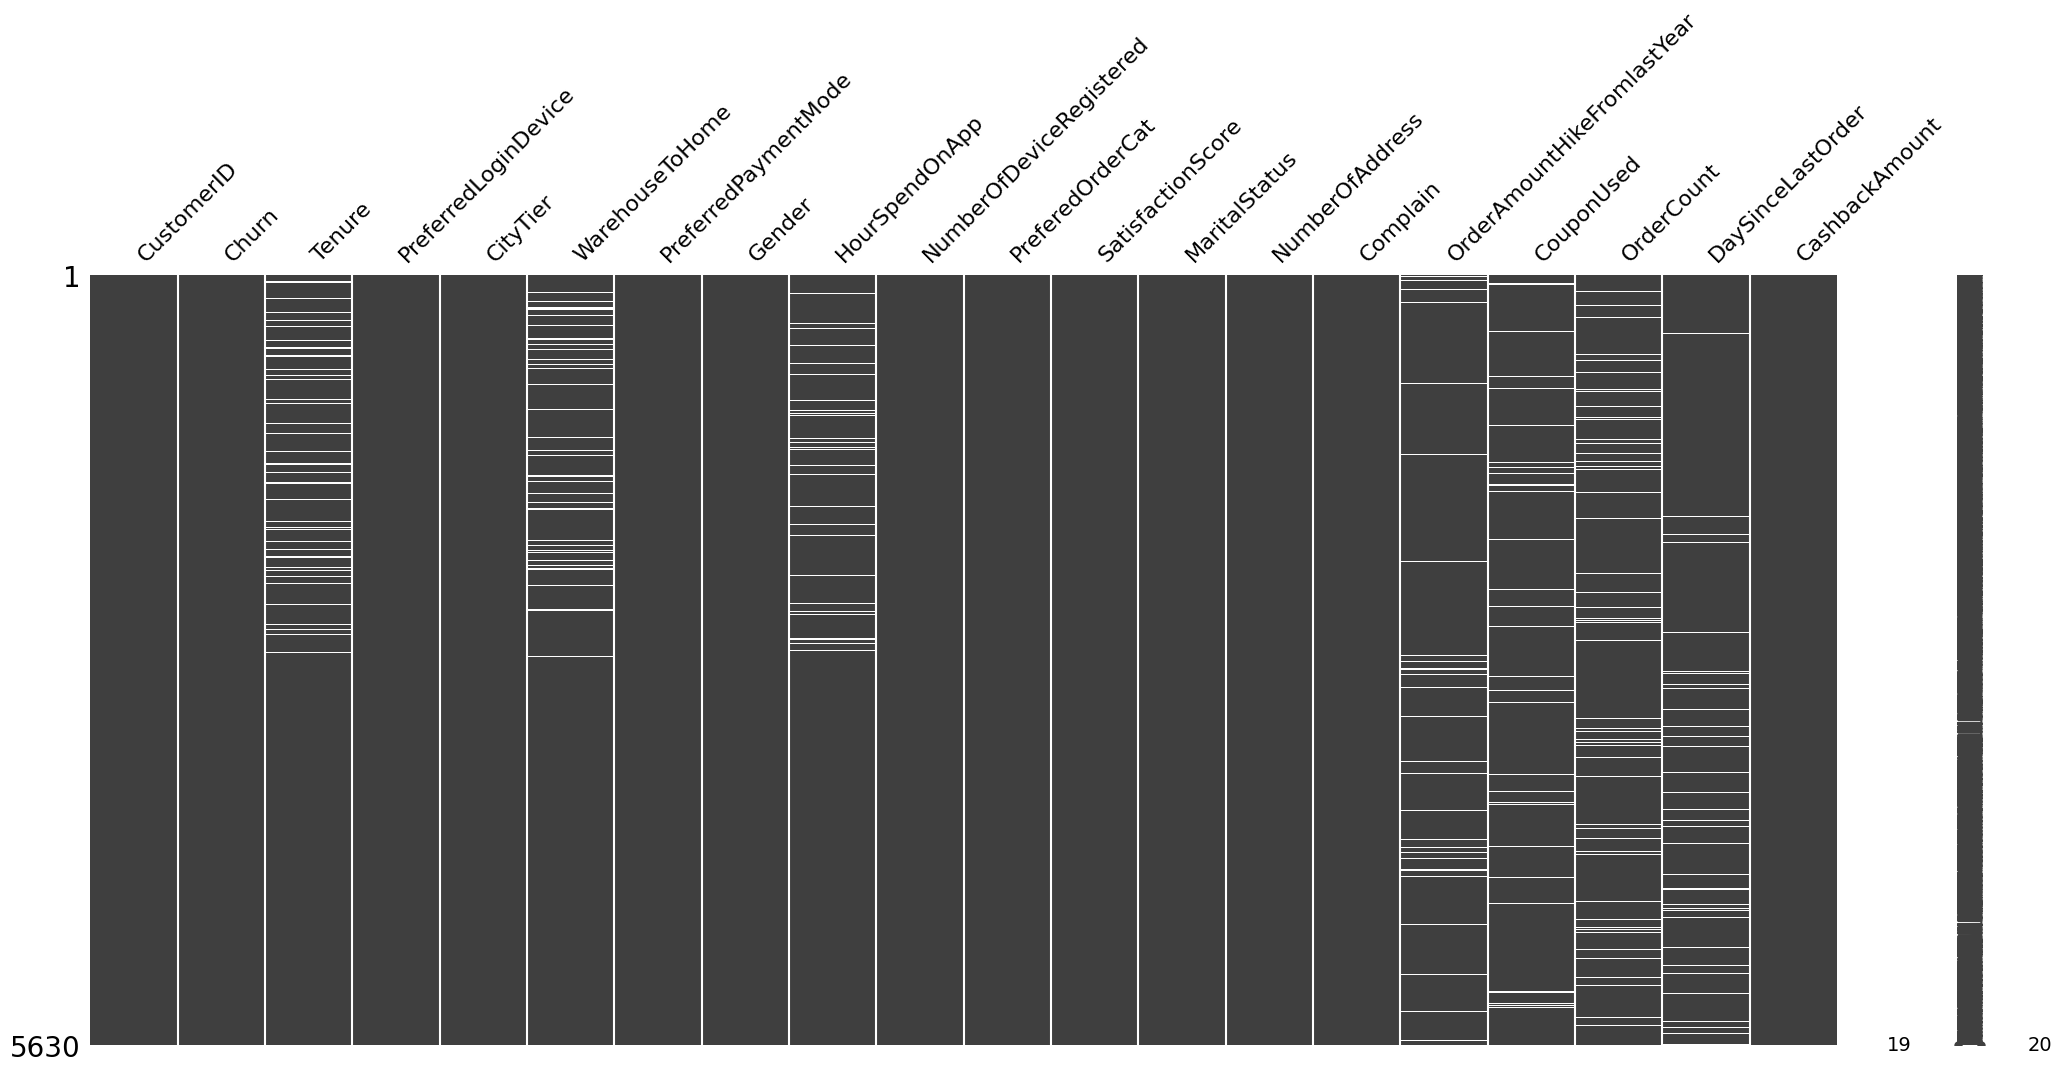

In [ ]:
msno.matrix(df)

<Axes: >

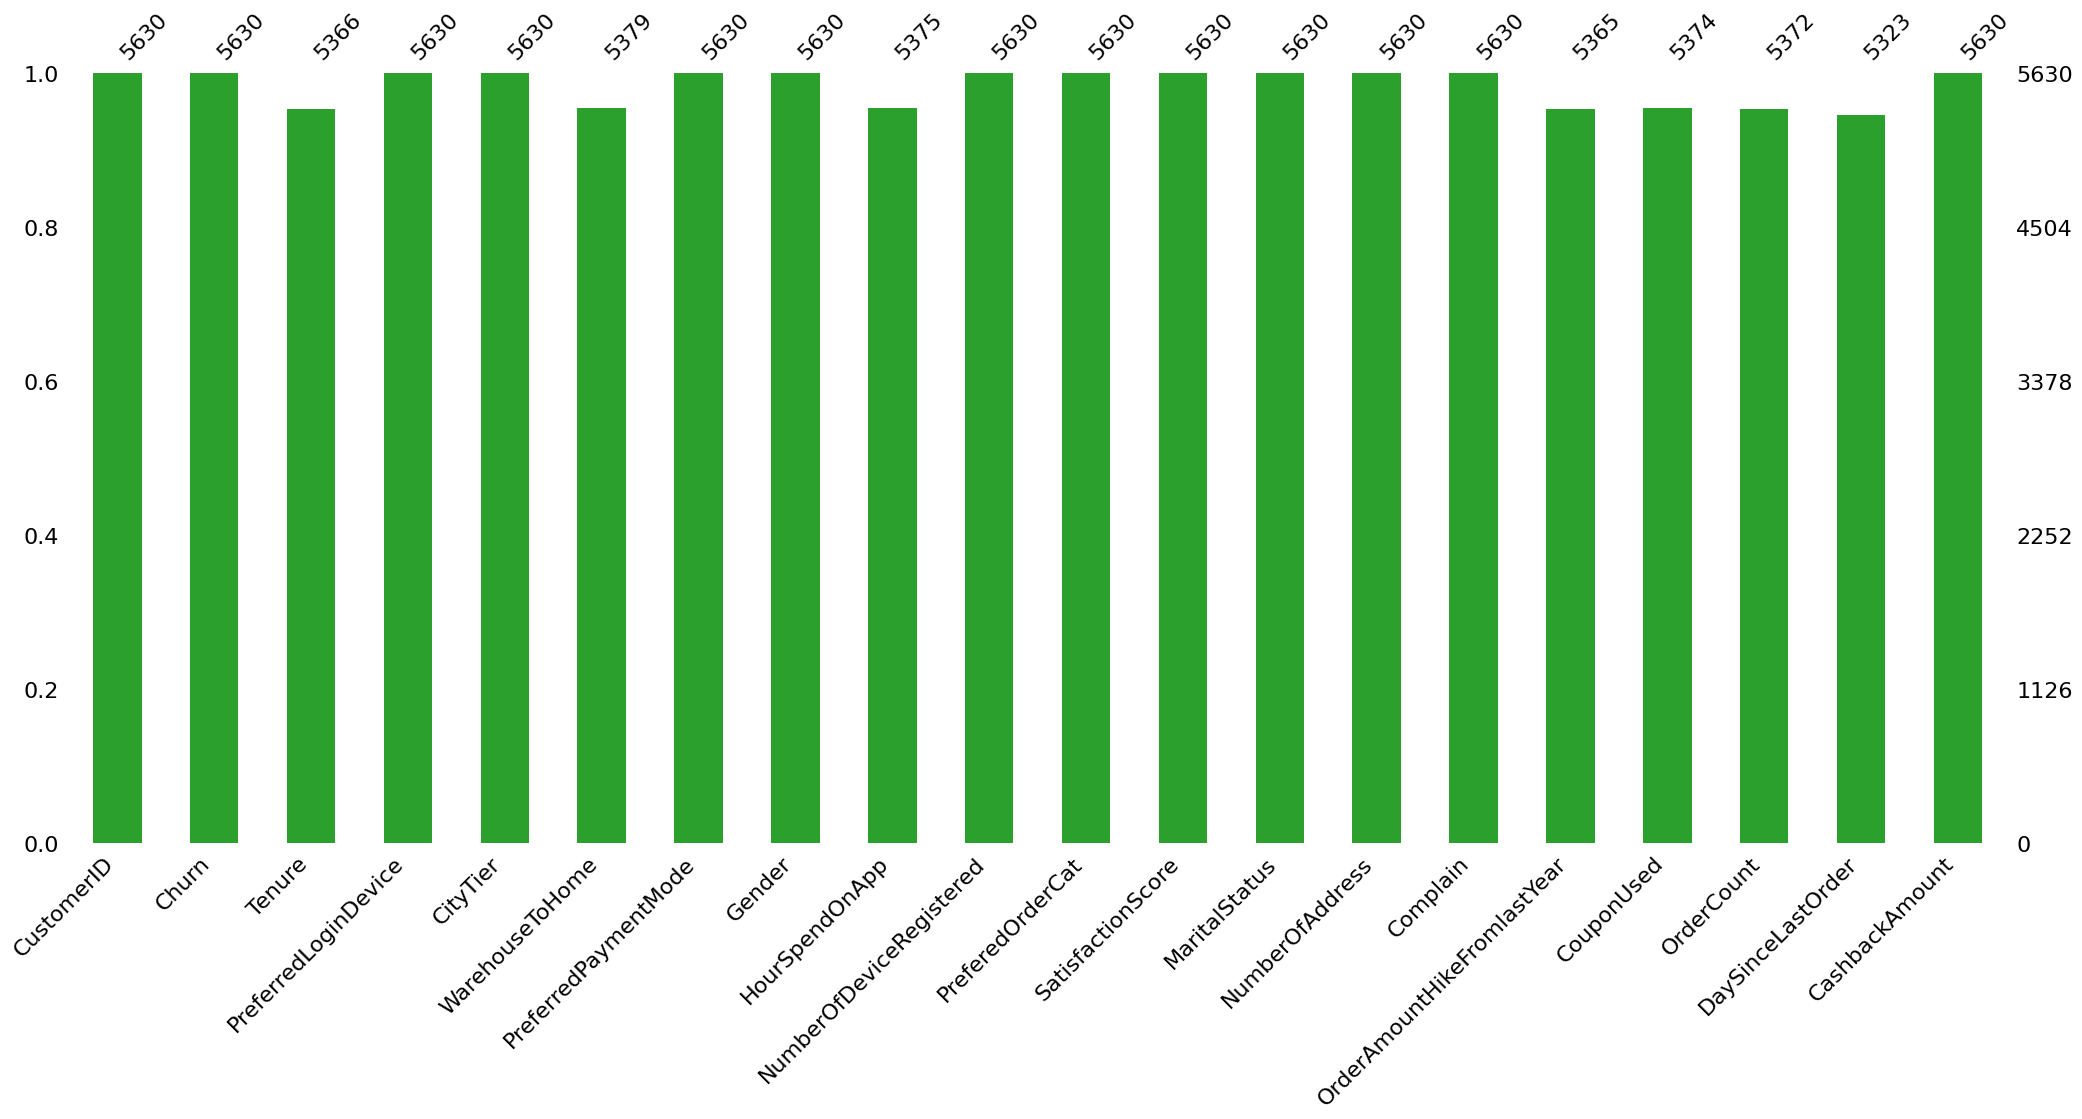

In [ ]:
msno.bar(df , color="tab:green")

#### All Missing values less than 6% so we can impute them

<Axes: xlabel='Tenure', ylabel='Density'>

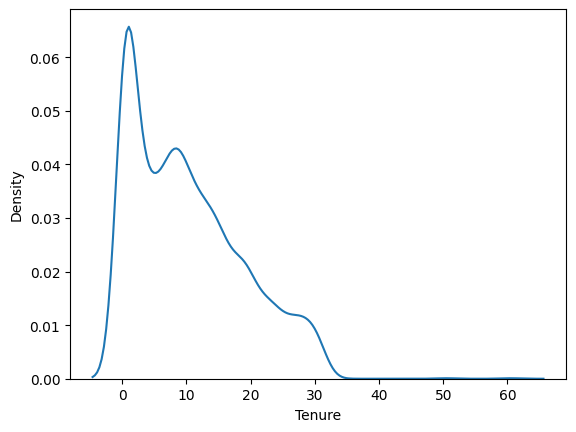

In [ ]:
sns.kdeplot(df , x='Tenure')

In [ ]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

<Axes: xlabel='Tenure', ylabel='Density'>

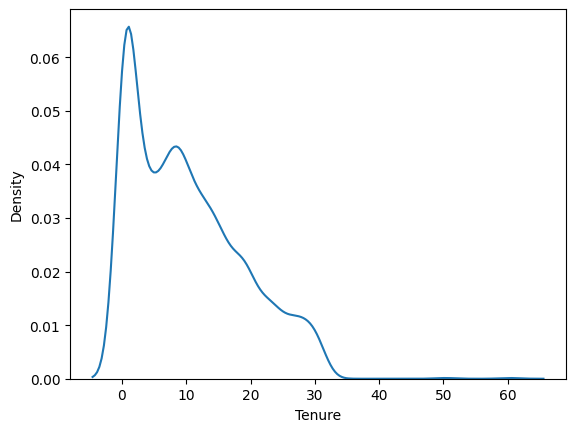

In [ ]:
sns.kdeplot(df , x='Tenure')

In [ ]:
df['Tenure'].isnull().sum()

np.int64(0)

-------------------------------

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

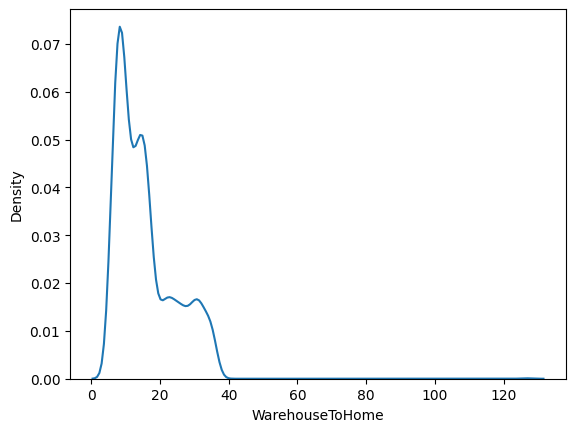

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')

In [ ]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

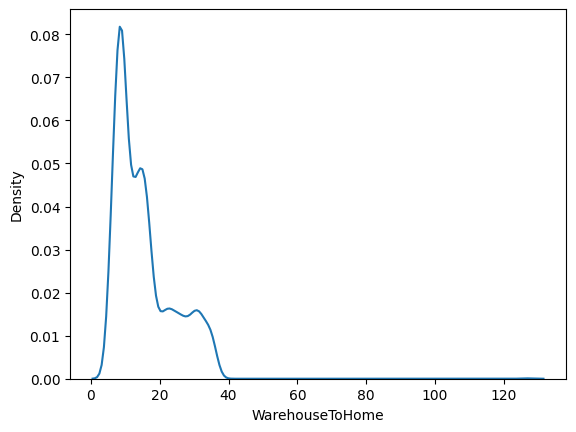

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')

In [ ]:
df['WarehouseToHome'].isnull().sum()

np.int64(0)

---------------------------------------------------

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

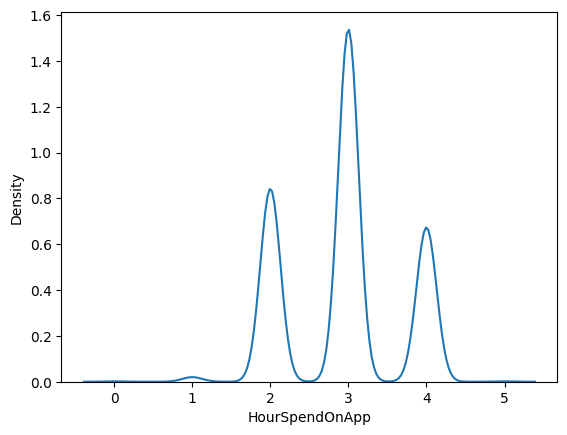

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')

In [ ]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

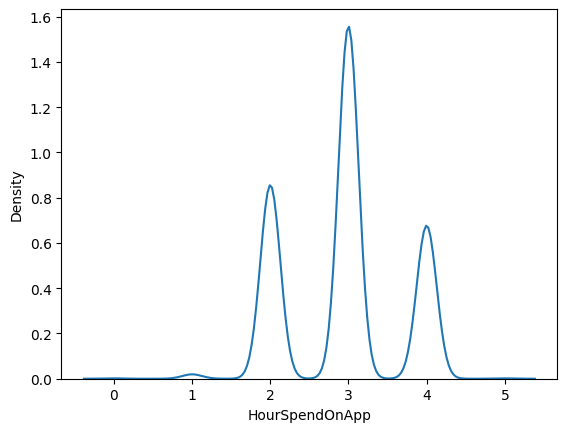

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')

In [ ]:
df['HourSpendOnApp'].isnull().sum()

np.int64(0)

-------------------------------------------------------

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

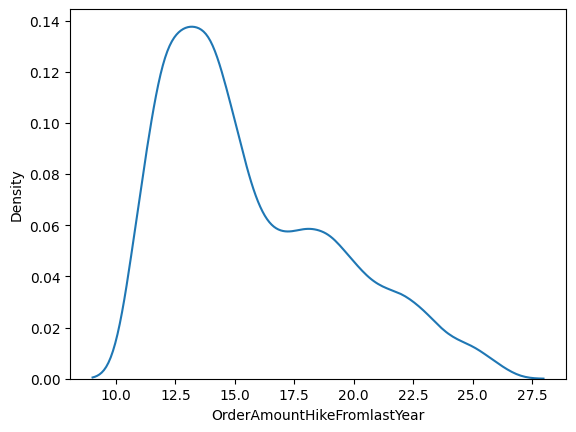

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [ ]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

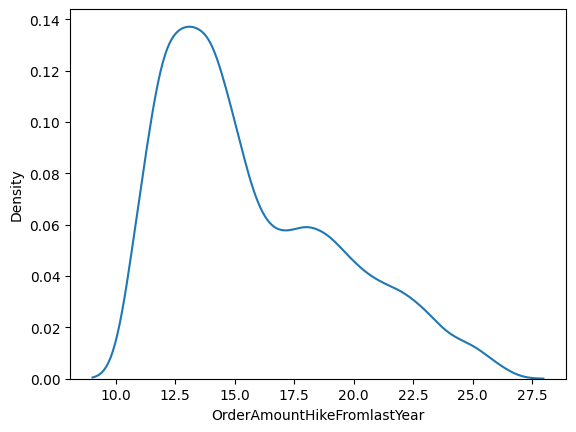

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [ ]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

np.int64(0)

--------------------------------------------

<Axes: xlabel='CouponUsed', ylabel='Density'>

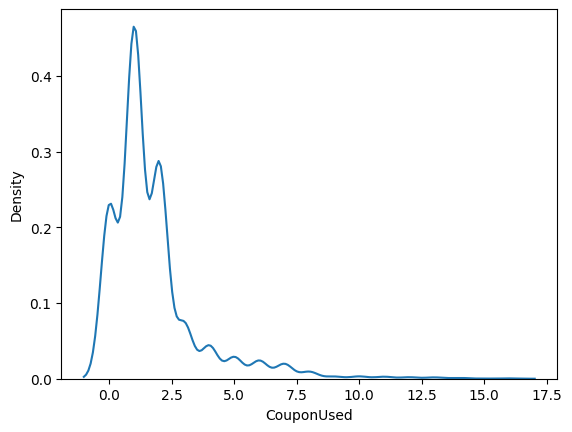

In [ ]:
sns.kdeplot(df , x='CouponUsed')

In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

<Axes: xlabel='CouponUsed', ylabel='Density'>

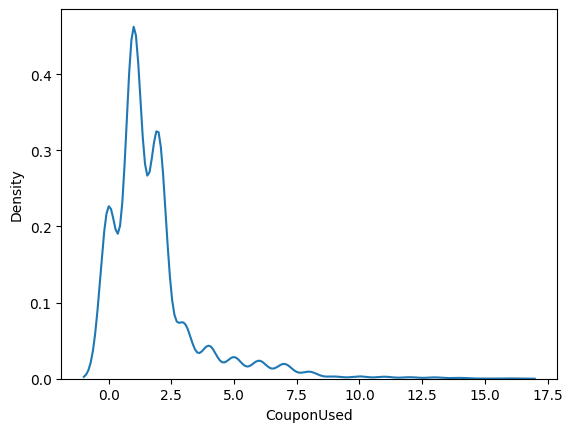

In [ ]:
sns.kdeplot(df , x='CouponUsed')

In [ ]:
df['CouponUsed'].isnull().sum()

np.int64(0)

--------------------------------------------

<Axes: xlabel='OrderCount', ylabel='Density'>

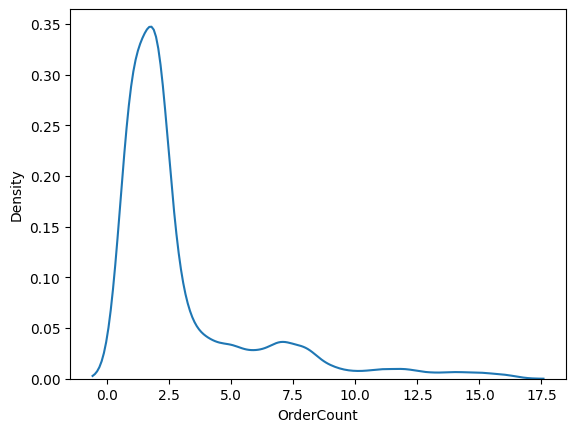

In [ ]:
sns.kdeplot(df , x='OrderCount')

In [ ]:
# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])

<Axes: xlabel='OrderCount', ylabel='Density'>

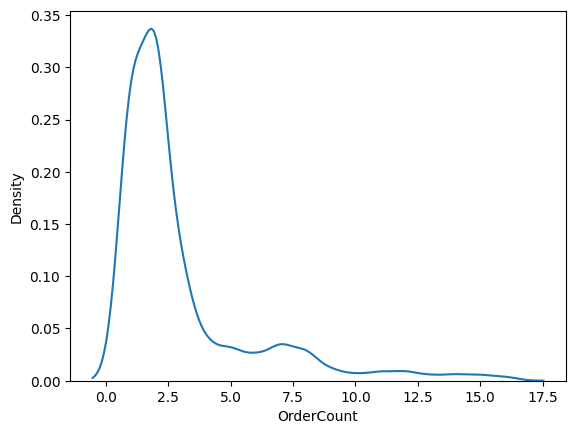

In [ ]:
sns.kdeplot(df , x='OrderCount')

In [ ]:
df['OrderCount'].isnull().sum()

np.int64(0)

----------------------------------

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

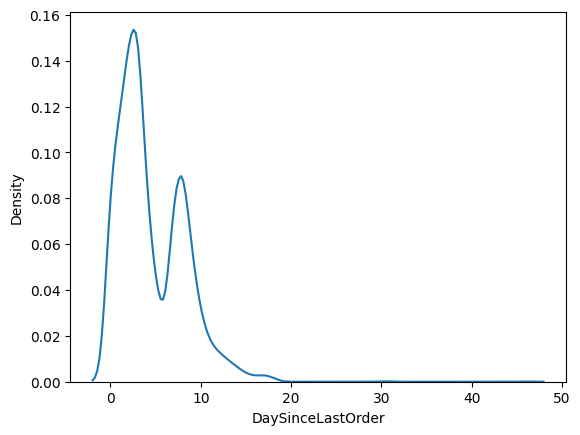

In [ ]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [ ]:
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

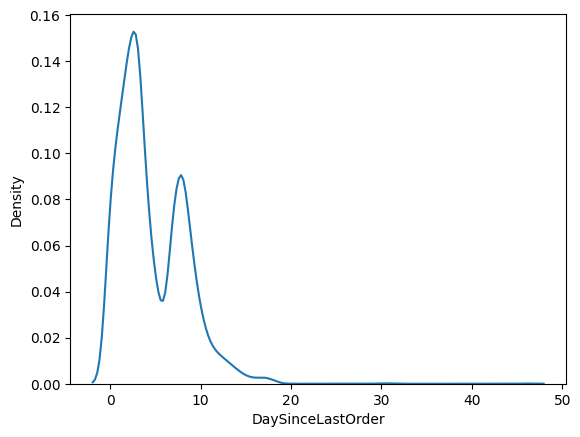

In [ ]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [ ]:
df['DaySinceLastOrder'].isnull().sum()

np.int64(0)

In [ ]:
# After we Checked the data the Customer ID Column not important for our Models so We drop it
df.drop('CustomerID' , axis = 1 , inplace = True)

In [ ]:
df.shape

(5630, 19)

#### We Handled Mssing Values

## Encoding

In [ ]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [ ]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
le = LabelEncoder()

In [ ]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [ ]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
1,1,4,1,3,2
2,1,2,1,3,2
3,1,2,1,2,2


## Handling Outliers

In [ ]:
df.dtypes

,0
Churn,int64
Tenure,float64
PreferredLoginDevice,int64
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,int64
Gender,int64
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64
PreferedOrderCat,int64


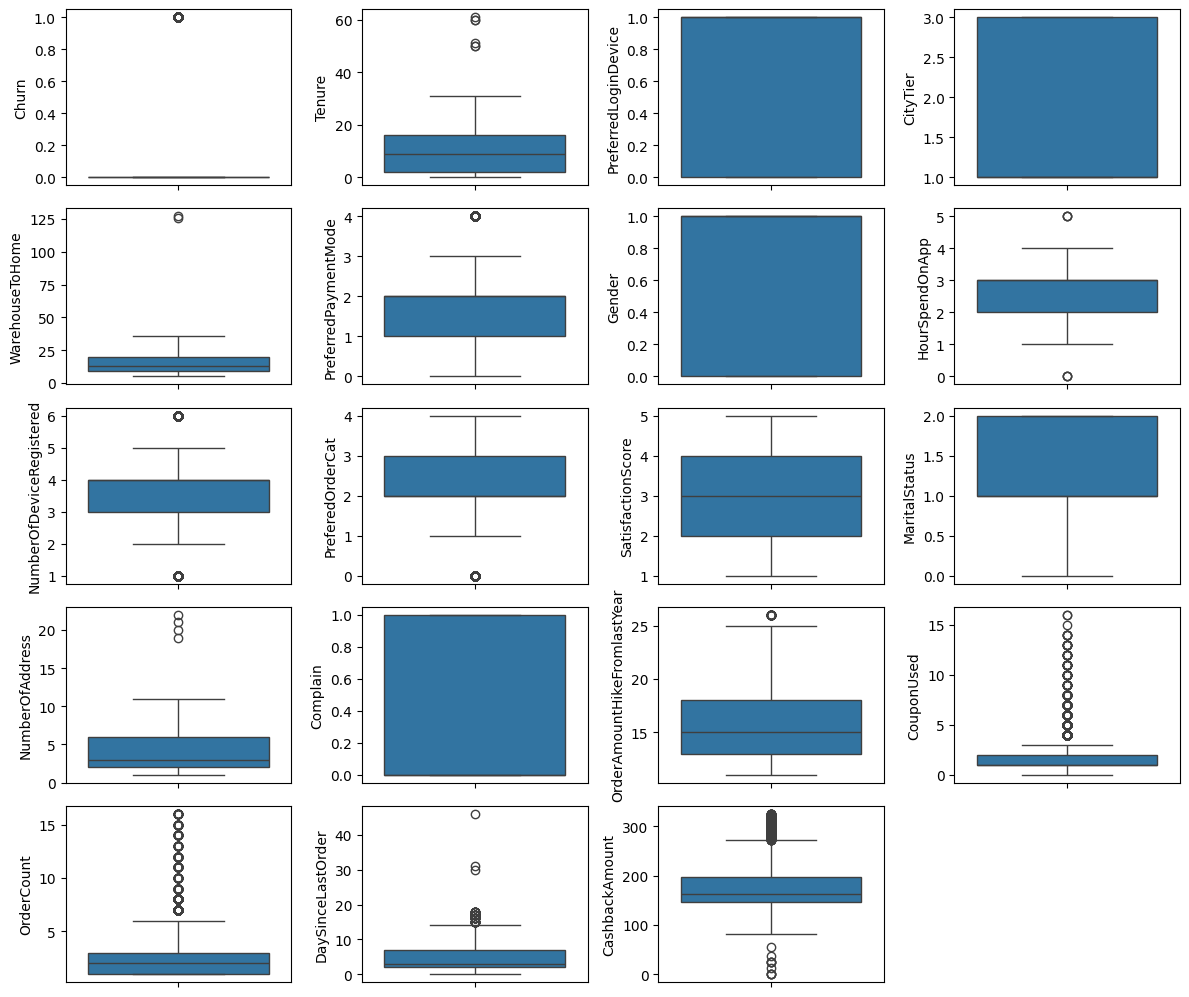

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


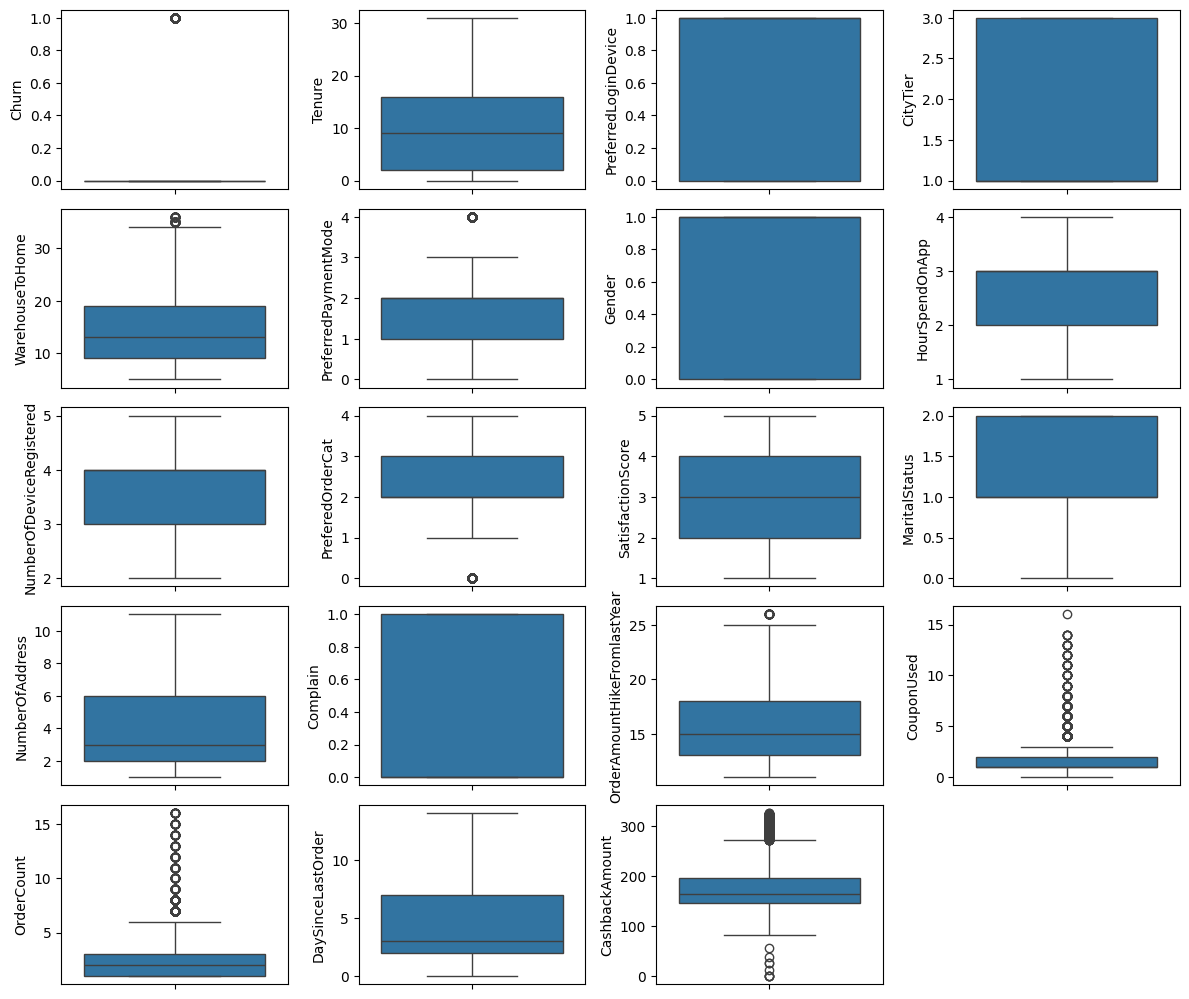

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

#### we made Trim on cols that contains outliers but after we check we saw many inforamtion deleted so we made Trimming only on cols that not conatins many outliers

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.336058,-0.041250,0.069595,0.054768,-0.005156,0.038193,-0.001991,0.079116,0.105149,0.108600,0.131982,0.033703,0.252346,-0.002545,-0.017914,-0.036568,-0.164448,-0.165008
Tenure,-0.336058,1.000000,0.034596,-0.065933,-0.011849,-0.016797,-0.054684,-0.006130,-0.019592,-0.180637,-0.013331,-0.111074,0.240939,-0.023903,0.017177,0.127314,0.181138,0.164444,0.453981
PreferredLoginDevice,-0.041250,0.034596,1.000000,0.010097,-0.015852,0.009610,-0.012892,0.025571,-0.005323,0.005137,0.037642,-0.020207,0.033310,0.005983,-0.005296,-0.015940,-0.021975,-0.027906,0.042321
CityTier,0.069595,-0.065933,0.010097,1.000000,0.014636,0.251539,-0.022759,-0.011579,0.007282,-0.164040,-0.009735,0.002254,-0.033363,0.006312,-0.022135,0.017139,0.035656,0.023394,0.044946
WarehouseToHome,0.054768,-0.011849,-0.015852,0.014636,1.000000,0.008046,-0.015904,0.091230,0.029049,-0.114357,0.013783,-0.028226,0.001173,0.022052,0.028927,0.013175,0.016235,0.044883,0.036318
PreferredPaymentMode,-0.005156,-0.016797,0.009610,0.251539,0.008046,1.000000,0.020086,-0.009966,0.012908,-0.030738,-0.018085,-0.024158,0.003223,0.028288,-0.000268,-0.008582,-0.039249,-0.003581,0.034381
Gender,0.038193,-0.054684,-0.012892,-0.022759,-0.015904,0.020086,1.000000,-0.017445,-0.020954,0.060969,-0.037348,-0.019975,-0.030577,-0.030350,-0.007694,-0.026477,-0.031097,-0.027594,-0.024311
HourSpendOnApp,-0.001991,-0.006130,0.025571,-0.011579,0.091230,-0.009966,-0.017445,1.000000,0.269879,0.025273,0.029646,-0.048369,0.138460,-0.004004,0.104818,0.186330,0.109218,0.088546,0.120624
NumberOfDeviceRegistered,0.079116,-0.019592,-0.005323,0.007282,0.029049,0.012908,-0.020954,0.269879,1.000000,-0.011521,-0.001042,0.037437,0.071084,-0.002056,0.061287,0.135974,0.092487,0.026054,0.120031
PreferedOrderCat,0.105149,-0.180637,0.005137,-0.164040,-0.114357,-0.030738,0.060969,0.025273,-0.011521,1.000000,-0.002726,0.042430,-0.096412,-0.000339,0.001494,-0.153064,-0.179645,-0.235615,-0.340988


<Axes: >

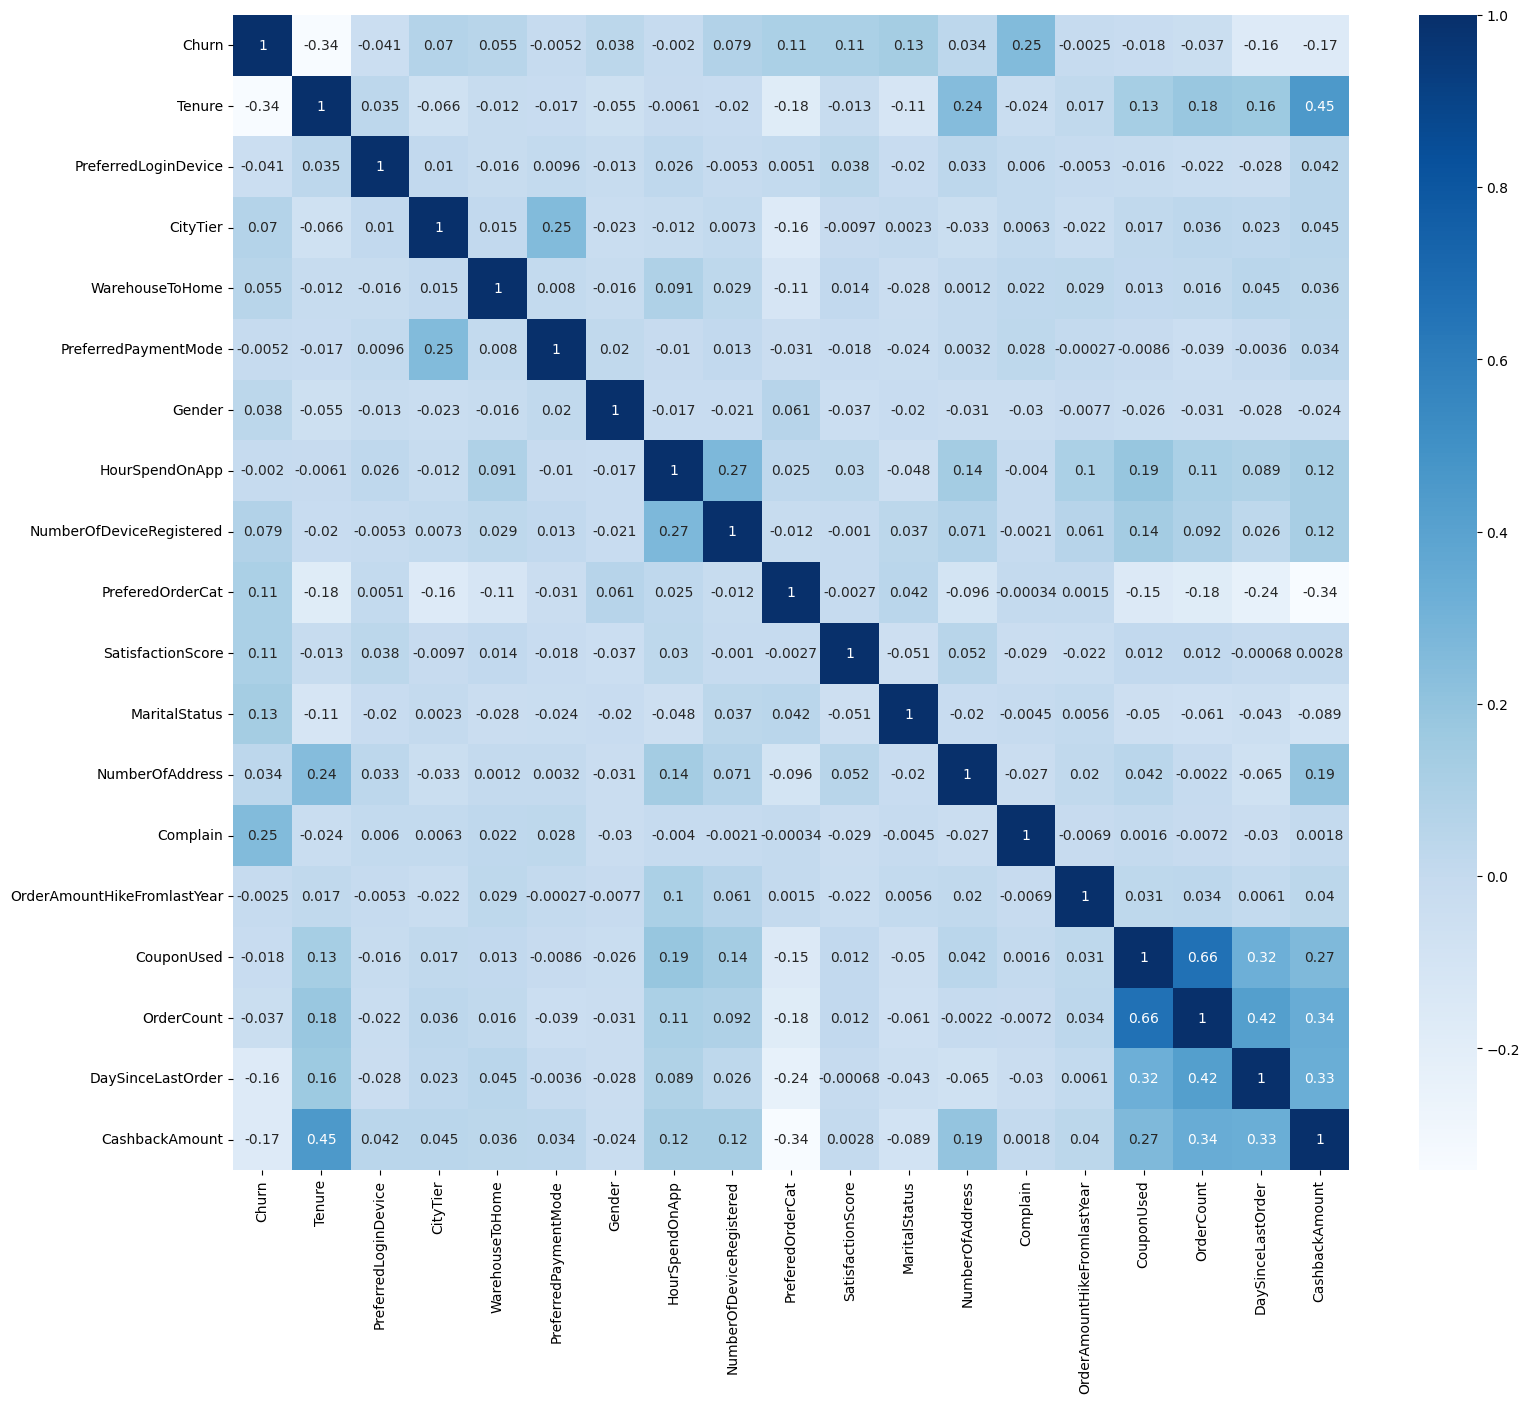

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

,Churn
Churn,1.000000
Complain,0.252346
MaritalStatus,0.131982
SatisfactionScore,0.108600
PreferedOrderCat,0.105149
NumberOfDeviceRegistered,0.079116
CityTier,0.069595
WarehouseToHome,0.054768
Gender,0.038193
NumberOfAddress,0.033703


Text(0.5, 1.0, 'Relation Between Features and target')

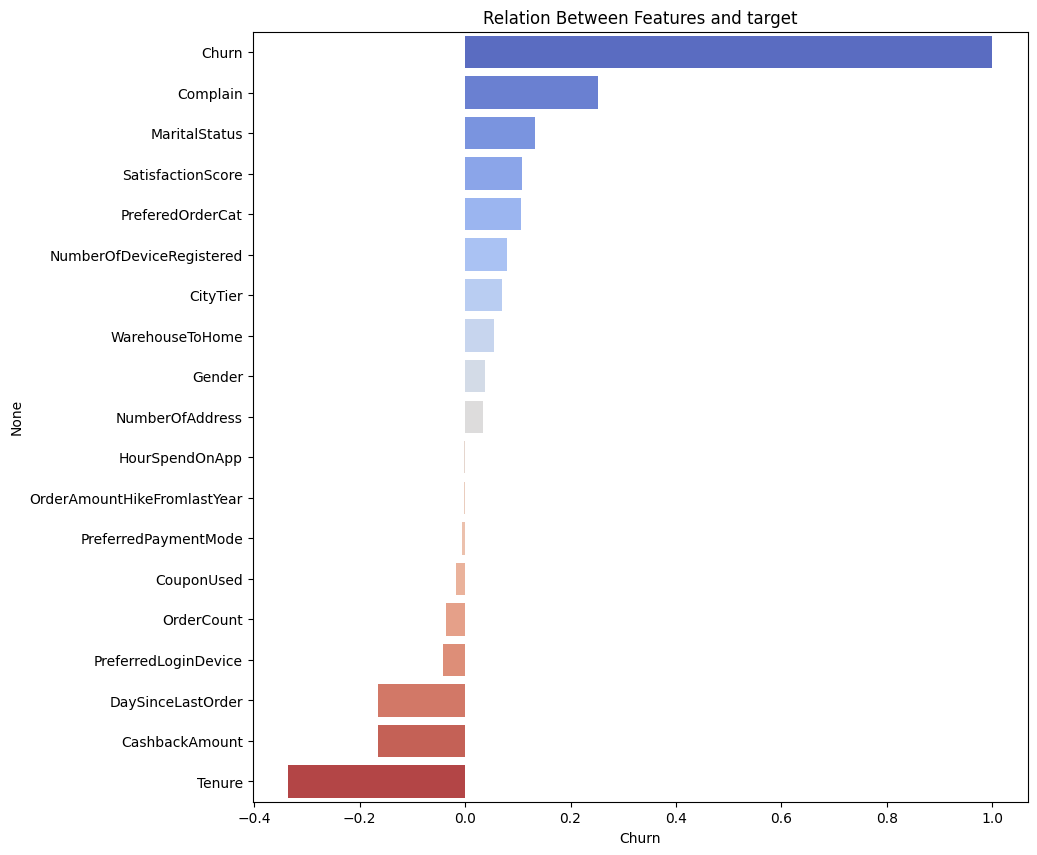

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [ ]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

#### Our Data Imbalanced so lets make Over sample for it Using SMOTETomek

## Handling Imbalanced Data

In [ ]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [ ]:
x_over.shape, y_over.shape

((8582, 18), (8582,))

## Split Data

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

<a id="Modeling"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Modeling</center></h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [ ]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7691027135009156
Test Score: 0.7716504854368932
Acc Train: 0.7691027135009156
Acc Test: 0.7716504854368932
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9059430664225071
Test Score: 0.8796116504854369
Acc Train: 0.9059430664225071
Acc Test: 0.8796116504854369
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9390291262135922
Acc Train: 1.0
Acc Test: 0.9390291262135922
                                                            
************************************************************
                                                            
Using m

In [ ]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.769103,0.771650
Support Vector Machine,0.905943,0.879612
Decision Tree,1.000000,0.939029
Random Forest,1.000000,0.971262
XGBClassifier,1.000000,0.955728
AdaBoostClassifier,0.854836,0.846602


In [ ]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

### from Graphs Best 2 Models in Train and Test are [ Random Forest , XGBoost]

In [ ]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

<a id="Evaluation"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Evaluation</center></h1>

Accuracy = 0.7716504854368932
ROC Area under Curve = 0.771332809569669
              precision    recall  f1-score   support

           0    0.77714   0.75138   0.76404      1267
           1    0.76667   0.79128   0.77878      1308

    accuracy                        0.77165      2575
   macro avg    0.77190   0.77133   0.77141      2575
weighted avg    0.77182   0.77165   0.77153      2575

**********************************************************************


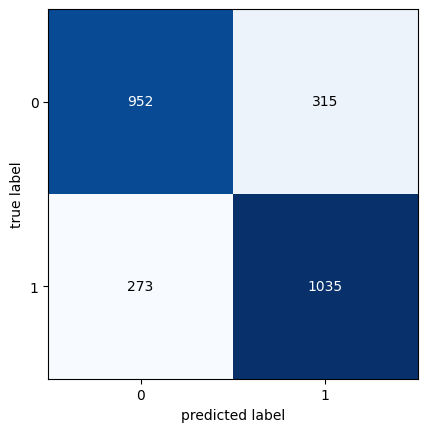

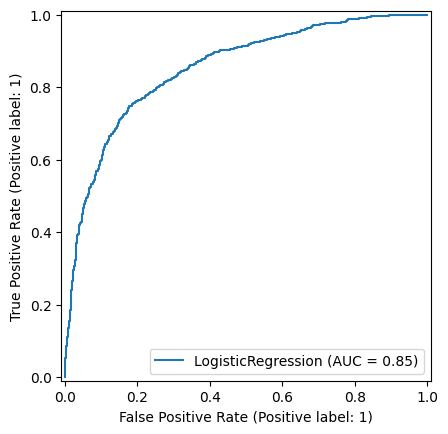

In [ ]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8796116504854369
ROC Area under Curve = 0.8793213519378049
              precision    recall  f1-score   support

           0    0.89061   0.86109   0.87560      1267
           1    0.86963   0.89755   0.88337      1308

    accuracy                        0.87961      2575
   macro avg    0.88012   0.87932   0.87949      2575
weighted avg    0.87995   0.87961   0.87955      2575



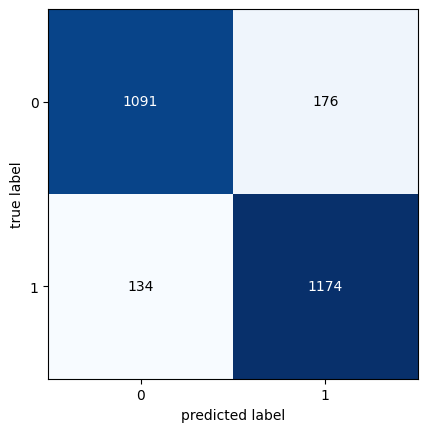

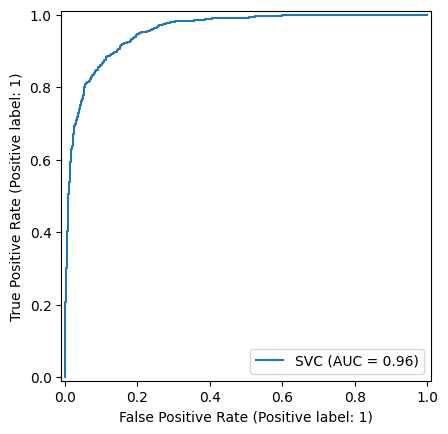

In [ ]:
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9355339805825242
ROC Area under Curve = 0.9354063030250369
              precision    recall  f1-score   support

           0    0.94075   0.92739   0.93402      1267
           1    0.93062   0.94343   0.93698      1308

    accuracy                        0.93553      2575
   macro avg    0.93569   0.93541   0.93550      2575
weighted avg    0.93560   0.93553   0.93552      2575



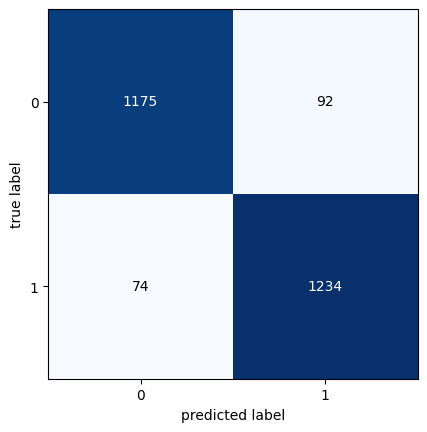

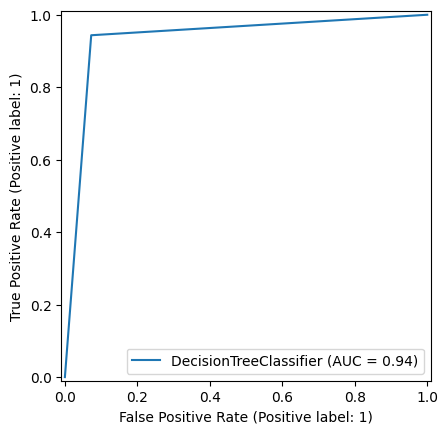

In [ ]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9700970873786408
ROC Area under Curve = 0.9698235495729033
              precision    recall  f1-score   support

           0    0.98611   0.95264   0.96909      1267
           1    0.95559   0.98700   0.97104      1308

    accuracy                        0.97010      2575
   macro avg    0.97085   0.96982   0.97007      2575
weighted avg    0.97061   0.97010   0.97008      2575



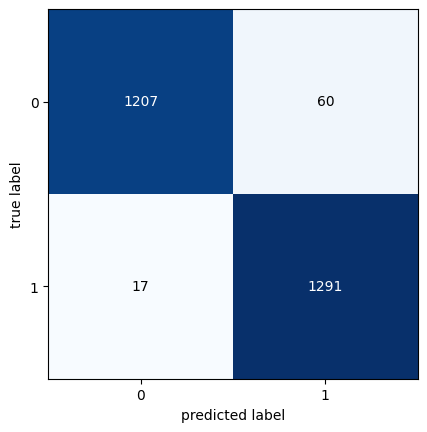

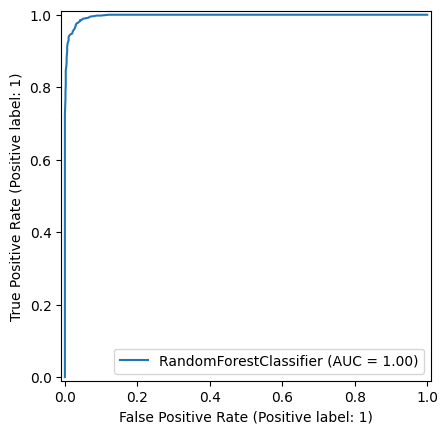

In [ ]:
# random forest
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9557281553398058
ROC Area under Curve = 0.9550860589559966
              precision    recall  f1-score   support

           0    0.99485   0.91476   0.95312      1267
           1    0.92340   0.99541   0.95806      1308

    accuracy                        0.95573      2575
   macro avg    0.95913   0.95509   0.95559      2575
weighted avg    0.95856   0.95573   0.95563      2575



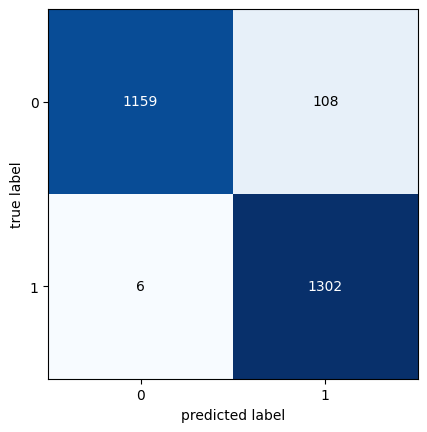

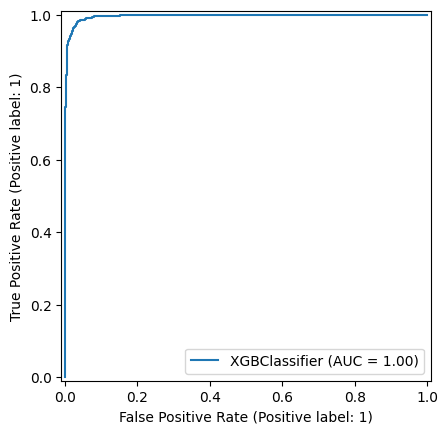

In [ ]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8466019417475729
ROC Area under Curve = 0.8466187072933486
              precision    recall  f1-score   support

           0    0.84169   0.84767   0.84467      1267
           1    0.85142   0.84557   0.84848      1308

    accuracy                        0.84660      2575
   macro avg    0.84656   0.84662   0.84658      2575
weighted avg    0.84664   0.84660   0.84661      2575



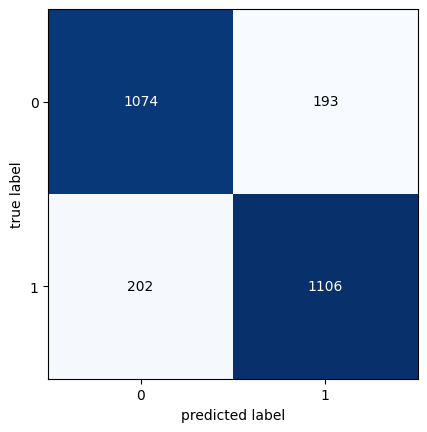

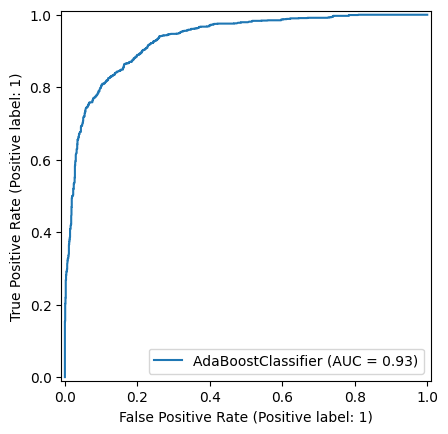

In [ ]:
# adaboost
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

<a id="Auto_ML"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Auto ML</center></h1>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
from pycaret.classification import *

In [ ]:
# init setup
model_setup = setup(df , target = 'Churn' , train_size=0.7)

In [ ]:
# model training and selection
best_model = compare_models()

In [ ]:
# evaluate trained model
evaluate_model(best_model)

<a id="Recommendations_&_Conclustion"></a>
<div class="Recommendations & Conclusion" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>Recommendations & Conclusion</center></h1>
  <ul>
    <li >Should consider that the higher percntage are males incresing the products that grap the males interest and so on.</li>
    <li>May be the comapny should consider taking care of the products that suits the single and the married customers as the single are more likly to churn</li>
    <li>The company should consider the products that not that expensive or that cheap so that the medium city tier 2 can trust buying it cause as a medium tier customer i wo't afford buying expensive products and i won't trust buying cheap products as they won't meet my needs</li>
    <li>The company should think of another technique other than satisfaction score or complaining may be a hot line to recive the complains to get fast results or provied regular phone calls to recive feedback from the customers</li>
    <li>The company should check the mobile version of the store to see if there is any problem with the ui/ux</li>
    <li>Once the customer has reached 12%-15% orderamount the company should consider focusing more on grap their attention with the products they like</li>
    <li>For customers who have just bought electronic goods, cross-selling can be done by offering electronic accessories, such as keyboards, mice, etc.</li>      

  </ul>
</div>